# SPLAT Tutorials: Querying Online Datasets

## Authors
Adam Burgasser

## Version date
22 February 2022

## Learning Goals
* Understanding basic SPLAT database management & query tools
* Query common catalogs with queryVizier(), querySIMBAD(), and queryXMatch()
* Query specialty/individual catalogs with queryVizier() and queryXMatch()
* Find out what catalogs are available in Vizier and XMatch with getVizierName() and astroquery XMatch tools
* Download whole catalogs using getVizierCatalog()

## Keywords
online databases, data management, data query tools

## Companion Content
dataset: Terrien2015.tsv

## Summary
In this tutorial, we are going to see how we identify information on our sources by querying online databases using SPLAT's queryVizier() and queryXMatch() tools, which are wrappers of the Astropy astroquery affiliated package (Ginsberg et al. 2019, AJ 157, 98: https://ui.adsabs.harvard.edu/abs/2019AJ....157...98G/abstract)

## Required packages
* astropy: included in anaconda python installation; see https://www.astropy.org/ 
* astroquery: see https://astroquery.readthedocs.io/en/latest/
* pandas: included in anaconda python installation; see https://pandas.pydata.org/getting_started.html 


In [1]:
# main splat import
import splat
import splat.database as spdb
import splat.plot as splot

# other useful imports
import copy
import numpy as np
import pandas
import astropy
import astropy.units as u
import astroquery

# check versions
print('SPLAT version: {}'.format(splat.initialize.__version__))
print('Astropy version: {}'.format(astropy.__version__))
print('Astroquery version: {}'.format(astroquery.__version__))
print('Pandas version: {}'.format(pandas.__version__))




Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/


Could not import regions, which is required for some of the functionalities of this module.
SPLAT version: 2022.02.22
Astropy version: 4.3.1
Astroquery version: 0.4.1
Pandas version: 1.3.5


# Basic database methods

SPLAT contains several tools to work with databases of sources, which make use of the pandas database structure. To learn more about using pandas, try the pandas in 10 minutes tutorial at https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html. 

We're going to explore this by looking at sources in the Terrien et al. 2015 of SpeX SXD spectra of M dwarfs; see https://ui.adsabs.harvard.edu/abs/2015ApJS..220...16T/abstract. We're going to first read in the data file from the Vizier online database for Table 4 from this paper located at https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/ApJS/220/16/table4


In [4]:
# Read in file with pandas, removing comment lines and the first 2 rows which are informational
# NOTE: the path below may need to be modified to reach the file contained in splat_tutorials/datasets/
file = '../datasets/Terrien2015.tsv'
dp = pandas.read_csv(file,delimiter='\t',comment='#')
dp.drop([0,1],axis=0,inplace=True)
dp.reset_index(inplace=True,drop=True)
dp

,2MASS,RAJ2000,DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,2MQF,...,Nl167A,Nl167B,NMg171,NTeff,NRad,NLogL,Notes,UCAC4,MCat,Simbad
0,00063925-0705354,001.6636,-07.0932,9.83,0.03,9.26,0.03,8.96,0.02,AAA,...,0.66,0.91,0.66,,,,...,1,0,Simbad
1,00064325-0732147,001.6802,-07.5374,8.32,0.02,7.79,0.03,7.44,0.02,AAA,...,0.58,0.69,0.34,,,,...,0,0,Simbad
2,00074264+6022543,001.9277,+60.3818,8.91,0.02,8.33,0.02,8.05,0.02,AAA,...,0.88,1.23,1.00,,,-2.4238,...,0,0,Simbad
3,00085391+2050252,002.2247,+20.8403,8.87,0.03,8.26,0.03,8.01,0.02,AAA,...,0.82,1.17,0.99,,,-2.4413,...,1,2,Simbad
4,00102561+6212374,002.6067,+62.2104,9.65,0.02,9.09,0.02,8.81,0.01,AAA,...,1.40,1.93,1.69,3290,0.3043,-1.9562,...,1,0,Simbad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,23551649-0235417,358.8187,-02.5949,9.63,0.02,9.01,0.03,8.73,0.02,AAA,...,1.08,1.66,1.48,3264,0.2346,-2.0327,...,1,0,Simbad
882,23562041-0429316,359.0851,-04.4921,9.64,0.03,9.04,0.03,8.78,0.03,AAA,...,1.30,1.85,1.54,3301,0.2791,-1.9729,...,1,0,Simbad
883,23565510+2305033,359.2296,+23.0843,8.48,0.02,7.87,0.03,7.70,0.02,AAA,...,1.61,2.28,2.92,3654,0.4664,-1.3439,...,0,0,Simbad
884,23574516+1946112,359.4382,+19.7698,9.03,0.02,8.43,0.03,8.16,0.03,AAA,...,1.22,1.90,1.80,3304,0.2972,-1.8621,...,1,0,Simbad


In [5]:
# The first column contains the designations of each the sources; let's start with these
# we're going to add a "J" in the front to make sure these are properly designated as J2000 coordinates
dp['DESIGNATION'] = ['J'+x for x in dp['2MASS']]
dpc = dp[['DESIGNATION']]
dpc

,DESIGNATION
0,J00063925-0705354
1,J00064325-0732147
2,J00074264+6022543
3,J00085391+2050252
4,J00102561+6212374
...,...
881,J23551649-0235417
882,J23562041-0429316
883,J23565510+2305033
884,J23574516+1946112


In [6]:
# The coordiante is our starting point for all queries, but it's not all the information we need
# splat.database.prepDB() fills in the relevant columns for RA, DEC, and astropy SkyCoord
dpc = spdb.prepDB(dpc)
dpc

,DESIGNATION,COORDINATES,RA,DEC,SHORTNAME
0,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705
1,J00064325-0732147,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.680...",1.680208,-7.537417,J0006-0732
2,J00074264+6022543,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.927...",1.927667,60.381750,J0007+6022
3,J00085391+2050252,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.224...",2.224625,20.840333,J0008+2050
4,J00102561+6212374,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.606...",2.606708,62.210389,J0010+6212
...,...,...,...,...,...
881,J23551649-0235417,"<SkyCoord (ICRS): (ra, dec) in deg\n (358.8...",358.818708,-2.594917,J2355-0235
882,J23562041-0429316,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.0...",359.085042,-4.492111,J2356-0429
883,J23565510+2305033,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.2...",359.229583,23.084250,J2356+2305
884,J23574516+1946112,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.438167,19.769778,J2357+1946


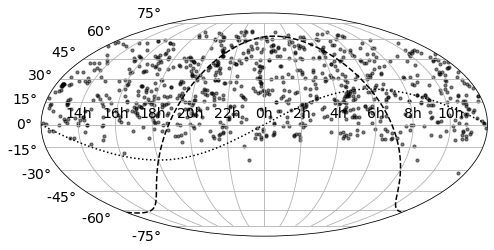

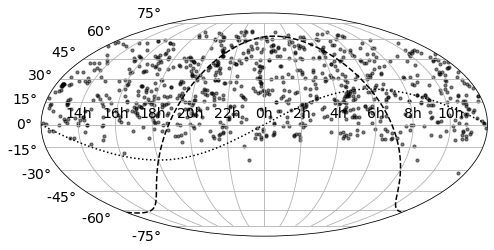

In [30]:
# just for fun: use the splat.plot.plotMap() function to plot up the coordinates of our sample 
# onto an equatorial sky map
splot.plotMap(list(dpc['COORDINATES']),galactic=True,ecliptic=True)

# Accessing Catalog information

Now that we have our coordinates set, we're going to access some catalog information using splat.database routines. These are just wrappers for the relevant astroquery tools which you can learn more about at https://astroquery.readthedocs.io/en/latest/

We're going to start by accessing 2MASS information for one of our sources

In [11]:
# using queryVizier with built in call for 2MASS catalog
# try repeating this for other catalogs: SDSS, WISE, ALLWISE, GAIA, LATEMOVERS, etc
dpq = spdb.queryVizier(dpc['COORDINATES'].iloc[0],catalog='J/AJ/153/259/',verbose=True)
dpq

<Table length=0>
<No columns>

In [7]:
# you can see what catalogs available by setting info=True
spdb.queryVizier(dpc['COORDINATES'].iloc[0],info=True)

Currently available input catalogs:
	SDSS: Vizier reference: V/147/sdss12
	URL = https://cdsarc.unistra.fr/viz-bin/cat/V/147

	2MASS: Vizier reference: II/246/out
	URL = https://cdsarc.unistra.fr/viz-bin/cat/II/246

	USNO: (or USNOB USNO-B USNOB1.0 USNO-B1.0) Vizier reference: I/284/out
	URL = https://cdsarc.unistra.fr/viz-bin/cat/I/284

	LSPM: (or LSPM-N LSPM-NORTH) Vizier reference: I/298/lspm_n
	URL = https://cdsarc.unistra.fr/viz-bin/cat/I/298

	WISE: Vizier reference: II/311/wise
	URL = https://cdsarc.unistra.fr/viz-bin/cat/II/311

	ALLWISE: Vizier reference: II/328/allwise
	URL = https://cdsarc.unistra.fr/viz-bin/cat/II/328

	CATWISE: Vizier reference: II/365/catwise
	URL = https://cdsarc.unistra.fr/viz-bin/cat/II/365

	UKIDSS: Vizier reference: II/314
	URL = https://cdsarc.unistra.fr/viz-bin/cat/II

	CFHT: (or CFHTLAS) Vizier reference: II/317/sample
	URL = https://cdsarc.unistra.fr/viz-bin/cat/II/317

	UCAC: Vizier reference: I/322A/out
	URL = https://cdsarc.unistra.fr/viz-bin/

In [13]:
# the default search radius is 30 arcseconds; see what happens when you expand this radius
dpq = spdb.queryVizier(dpc['COORDINATES'].iloc[0],catalog='J/AJ/153/259/',radius=300*u.arcsec)
dpq

<Table length=0>
<No columns>

In [37]:
# you can also be default just take the nearest source
dpq = spdb.queryVizier(dpc['COORDINATES'].iloc[0],catalog='2MASS',radius=300*u.arcsec,nearest=True)
dpq

,_r,RAJ2000,DEJ2000,errMaj,errMin,errPA,_2MASS,Jmag,Jcmsig,e_Jmag,...,PAopt,Bmag,Rmag,Nopt,extKey,scanKey,coaddKey,coadd,Opt,sep
0,0.107,1.663574,-7.093178,0.08,0.08,90,NaN,9.831,0.023,0.026,...,<NA>,NaN,NaN,0,<NA>,12092,278098,56,NaN,0.107


In [38]:
# here's all the columns this table is returning
print(dpq.columns)

Index(['_r', 'RAJ2000', 'DEJ2000', 'errMaj', 'errMin', 'errPA', '_2MASS',
       'Jmag', 'Jcmsig', 'e_Jmag', 'Jsnr', 'Hmag', 'Hcmsig', 'e_Hmag', 'Hsnr',
       'Kmag', 'Kcmsig', 'e_Kmag', 'Ksnr', 'Qflg', 'Rflg', 'Bflg', 'Cflg',
       'Ndet', 'prox', 'pxPA', 'pxCntr', 'Xflg', 'Aflg', 'Cntr', 'Hemis',
       'Date', 'Scan', 'GLON', 'GLAT', 'Xscan', '_tab1_36', 'Jpsfchi',
       'Hpsfchi', 'Kpsfchi', 'Jstdap', 'e_Jstdap', 'Hstdap', 'e_Hstdap',
       'Kstdap', 'e_Kstdap', 'edgeNS', 'edgeEW', 'edge', 'dup', 'use', 'opt',
       'Dopt', 'PAopt', 'Bmag', 'Rmag', 'Nopt', 'extKey', 'scanKey',
       'coaddKey', 'coadd', 'Opt', 'sep'],
      dtype='object')


In [39]:
# if you want just a subset of columns, you can downselect on the pandas dataframe
dpq = dpq[['_r','RAJ2000','DEJ2000','Jmag','e_Jmag','Hmag','e_Hmag','Kmag','e_Kmag','Date']]
dpq

,_r,RAJ2000,DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Date
0,0.107,1.663574,-7.093178,9.831,0.026,9.261,0.025,8.958,0.023,NaN


In [40]:
# we need to add this information into our catalog, which requires a little bit of pandas coding
# first make a copy of our original catalog
dpp = copy.deepcopy(dpc)
# then make some blank columns
for c in list(dpq.columns): dpp[c] = [np.nan]*len(dpp)
# now fill in the column info for our first source
for c in list(dpq.columns): dpp[c].iloc[0] = dpq[c].iloc[0]
dpp

,DESIGNATION,COORDINATES,RA,DEC,SHORTNAME,_r,RAJ2000,DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Date
0,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,0.107,1.663574,-7.093178,9.831,0.026,9.261,0.025,8.958,0.023,NaN
1,J00064325-0732147,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.680...",1.680208,-7.537417,J0006-0732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J00074264+6022543,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.927...",1.927667,60.381750,J0007+6022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J00085391+2050252,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.224...",2.224625,20.840333,J0008+2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J00102561+6212374,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.606...",2.606708,62.210389,J0010+6212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,J23551649-0235417,"<SkyCoord (ICRS): (ra, dec) in deg\n (358.8...",358.818708,-2.594917,J2355-0235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,J23562041-0429316,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.0...",359.085042,-4.492111,J2356-0429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,J23565510+2305033,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.2...",359.229583,23.084250,J2356+2305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,J23574516+1946112,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.438167,19.769778,J2357+1946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# now you could in principle run through all the sources one by one and query the relevant information
# THIS IS VERY TIME CONSUMING so just try the first 20
# We'll see a better tool for this is queryXMatch()
for i,c in enumerate(dpp['COORDINATES'].iloc[0:20]):
    dpq = spdb.queryVizier(c,catalog='2MASS',radius=60*u.arcsec,nearest=True)
    if len(dpq)>0: # check to make sure something was returned
        if i==0: # add in columns
            for c in list(dpq.columns): dpp[c] = [np.nan]*len(dpp)
        for c in list(dpq.columns): dpp[c].iloc[i] = dpq[c].iloc[0]
dpp

,DESIGNATION,COORDINATES,RA,DEC,SHORTNAME,_r,RAJ2000,DEJ2000,Jmag,e_Jmag,...,PAopt,Bmag,Rmag,Nopt,extKey,scanKey,coaddKey,coadd,Opt,sep
0,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,0.107,1.663574,-7.093178,9.831,0.026,...,<NA>,NaN,NaN,0.0,NaN,12092.0,278098.0,56.0,NaN,0.107
1,J00064325-0732147,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.680...",1.680208,-7.537417,J0006-0732,0.060,1.680230,-7.537419,8.323,0.019,...,<NA>,NaN,NaN,0.0,NaN,12092.0,278100.0,80.0,NaN,0.060
2,J00074264+6022543,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.927...",1.927667,60.381750,J0007+6022,0.030,1.927668,60.381756,8.911,0.021,...,<NA>,NaN,NaN,0.0,NaN,61323.0,1410408.0,21.0,NaN,0.030
3,J00085391+2050252,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.224...",2.224625,20.840333,J0008+2050,0.101,2.224661,20.840347,8.870,0.027,...,<NA>,NaN,NaN,0.0,NaN,53484.0,1230121.0,138.0,NaN,0.101
4,J00102561+6212374,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.606...",2.606708,62.210389,J0010+6212,0.034,2.606719,62.210400,9.655,0.021,...,315,15.1,13.0,1.0,NaN,29280.0,673426.0,103.0,NaN,0.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,J23551649-0235417,"<SkyCoord (ICRS): (ra, dec) in deg\n (358.8...",358.818708,-2.594917,J2355-0235,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,J23562041-0429316,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.0...",359.085042,-4.492111,J2356-0429,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,J23565510+2305033,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.2...",359.229583,23.084250,J2356+2305,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884,J23574516+1946112,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.438167,19.769778,J2357+1946,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# A parallel routhine for querying SIMBAD is querySIMBAD()
dpq = spdb.querySimbad(dpc['COORDINATES'].iloc[0],catalog='2MASS',radius=60*u.arcsec)
dpq

,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,...,FLUX_K,FLUX_ERROR_K,FLUX_SYSTEM_K,FLUX_BIBCODE_K,FLUX_VAR_K,FLUX_MULT_K,FLUX_QUAL_K,FLUX_UNIT_K,SCRIPT_NUMBER_ID,sep
0,PM J00066-0705,00 06 39.2451,-07 05 35.950,14,14,0.338,0.2299,90,A,O,...,8.958,0.023,Vega,2003yCat.2246....0C,,,C,K,1,0.554815


In [44]:
print(list(dpq.columns))

['MAIN_ID', 'RA', 'DEC', 'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA', 'COO_ERR_MINA', 'COO_ERR_ANGLE', 'COO_QUAL', 'COO_WAVELENGTH', 'COO_BIBCODE', 'OTYPE', 'PLX_VALUE', 'PLX_PREC', 'PLX_ERROR', 'PLX_QUAL', 'PLX_BIBCODE', 'SP_TYPE', 'SP_QUAL', 'SP_BIBCODE', 'PMRA', 'PMDEC', 'PMRA_PREC', 'PMDEC_PREC', 'PM_ERR_MAJA', 'PM_ERR_MINA', 'PM_ERR_ANGLE', 'PM_QUAL', 'PM_BIBCODE', 'ROT_upVsini', 'ROT_Vsini', 'ROT_err', 'ROT_mes', 'ROT_qual', 'ROT_bibcode', 'RVZ_RADVEL', 'RVZ_ERROR', 'RVZ_BIBCODE', 'FILTER_NAME_B', 'FLUX_B', 'FLUX_ERROR_B', 'FLUX_SYSTEM_B', 'FLUX_BIBCODE_B', 'FLUX_VAR_B', 'FLUX_MULT_B', 'FLUX_QUAL_B', 'FLUX_UNIT_B', 'FILTER_NAME_V', 'FLUX_V', 'FLUX_ERROR_V', 'FLUX_SYSTEM_V', 'FLUX_BIBCODE_V', 'FLUX_VAR_V', 'FLUX_MULT_V', 'FLUX_QUAL_V', 'FLUX_UNIT_V', 'FILTER_NAME_R', 'FLUX_R', 'FLUX_ERROR_R', 'FLUX_SYSTEM_R', 'FLUX_BIBCODE_R', 'FLUX_VAR_R', 'FLUX_MULT_R', 'FLUX_QUAL_R', 'FLUX_UNIT_R', 'FILTER_NAME_I', 'FLUX_I', 'FLUX_ERROR_I', 'FLUX_SYSTEM_I', 'FLUX_BIBCODE_I', 'FLUX_VAR_I', 'FLUX_MULT_

# Querying catalogs in bulk: queryXMatch()

The above tools are fine for individual source tools, but exceedingly slow and tedious for large datasets. Instead, we can use the splat.database.queryXMatch() tools, which makes use of Vizier's XMatch service to compare a set of coordinates to a catalog; see http://cdsxmatch.u-strasbg.fr/ and https://astroquery.readthedocs.io/en/latest/xmatch/xmatch.html

Note that XMatch returns only a subset of the columns available in a dataset; if you want all of the information, you need to go back and run queryVizier() or querySIMBAD(). It also returns by default just the closest source in the match, although this can be modified.


In [46]:
# query 2MASS data for all of the sources in our catalog
dpq = spdb.queryXMatch(dpc,catalog='SDSS',radius=60.*u.arcsec)
dpq

,DESIGNATION,COORDINATES,RA,DEC,SHORTNAME,SDSS_angDist,SDSS_RAdeg,SDSS_DEdeg,SDSS_errHalfMaj,SDSS_errHalfMin,...,SDSS_e_zph,SDSS_avg_zph,SDSS_pmRA,SDSS_e_pmRA,SDSS_pmDE,SDSS_e_pmDE,SDSS_SpObjID,SDSS_spType,SDSS_spCl,SDSS_subClass
0,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,1.023945,1.663301,-7.093013,0.086,0.081,...,NaN,NaN,-108.1,2.4,87.6,2.4,0.0,NaN,NaN,NaN
1,J00064325-0732147,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.680...",1.680208,-7.537417,J0006-0732,13.098528,1.676903,-7.538998,0.070,0.069,...,-9999.0,0.38825,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,J00074264+6022543,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.927...",1.927667,60.381750,J0007+6022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J00085391+2050252,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.224...",2.224625,20.840333,J0008+2050,2.086153,2.224494,20.839767,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,J00102561+6212374,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.606...",2.606708,62.210389,J0010+6212,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,J23551649-0235417,"<SkyCoord (ICRS): (ra, dec) in deg\n (358.8...",358.818708,-2.594917,J2355-0235,1.055552,358.818435,-2.595024,0.079,0.071,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
882,J23562041-0429316,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.0...",359.085042,-4.492111,J2356-0429,0.839051,359.085080,-4.492341,0.109,0.089,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
883,J23565510+2305033,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.2...",359.229583,23.084250,J2356+2305,2.945698,359.229321,23.083468,0.090,0.078,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
884,J23574516+1946112,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.438167,19.769778,J2357+1946,5.036975,359.438564,19.768429,0.073,0.069,...,NaN,NaN,124.4,2.3,-483.8,2.3,0.0,NaN,NaN,NaN


In [17]:
# wow, that was fast! 
# you can find out what other catalogs are available built in for XMatch with the info command
dpq = spdb.queryXMatch(dpc,info=True)

Currently available input catalogs:
	SIMBAD: Vizier reference: simbad

	2MASS: Vizier reference: vizier:II/246/out
	Vizier URL = https://cdsarc.unistra.fr/viz-bin/cat/II/246

	DENIS: Vizier reference: vizier:B/denis/denis
	Vizier URL = https://cdsarc.unistra.fr/viz-bin/cat/B/denis

	SDSS: (or SDSS12) Vizier reference: vizier:V/147/sdss12
	Vizier URL = https://cdsarc.unistra.fr/viz-bin/cat/V/147

	SDSS9: Vizier reference: vizier:V/139/sdss9
	Vizier URL = https://cdsarc.unistra.fr/viz-bin/cat/V/139

	ALLWISE: Vizier reference: vizier:II/328/allwise
	Vizier URL = https://cdsarc.unistra.fr/viz-bin/cat/II/328

	GAIA-DR1: (or GAIADR1 GAIA1) Vizier reference: vizier:I/337/gaia
	Vizier URL = https://cdsarc.unistra.fr/viz-bin/cat/I/337

	GAIA-DR2: (or GAIADR2 GAIA2) Vizier reference: vizier:I/345/gaia2
	Vizier URL = https://cdsarc.unistra.fr/viz-bin/cat/I/345

	GAIA-EDR3: (or GAIA-DR3 GAIAEDR3 GAIA3 GAIA) Vizier reference: vizier:I/350/gaiaedr3
	Vizier URL = https://cdsarc.unistra.fr/viz-bin/ca

In [47]:
# you can stack catalogs together (including SIMBAD) to get a bunch of information at once
dpq = copy.deepcopy(dpc)
for cat in ['SIMBAD','2MASS','SDSS','UKIDSS','PANSTARRS','GAIA']:
    dpq = spdb.queryXMatch(dpq,catalog=cat,radius=60.*u.arcsec)
dpq

,DESIGNATION,COORDINATES,RA,DEC,SHORTNAME,SIMBAD_angDist,SIMBAD_main_id,SIMBAD_ra,SIMBAD_dec,SIMBAD_coo_err_maj,...,GAIA-EDR3_phot_g_mean_mag_error,GAIA-EDR3_phot_bp_mean_mag_error,GAIA-EDR3_phot_rp_mean_mag_error,GAIA-EDR3_phot_g_mean_mag_corrected,GAIA-EDR3_phot_g_mean_mag_error_corrected,GAIA-EDR3_phot_g_mean_flux_corrected,GAIA-EDR3_phot_bp_rp_excess_factor_corrected,GAIA-EDR3_ra_epoch2000_error,GAIA-EDR3_dec_epoch2000_error,GAIA-EDR3_ra_dec_epoch2000_corr
0,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,0.544981,PM J00066-0705,1.663504,-7.093313,0.001,...,0.003012,0.006355,0.004261,13.340954,0.003005,86809.1,0.487,6.9680,4.0893,0.2969
1,J00064325-0732147,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.680...",1.680208,-7.537417,J0006-0732,2.453165,G 158-27,1.679988,-7.538062,0.000,...,0.002836,0.003141,0.003866,11.773832,0.002836,367633.0,0.005,1.0208,0.5300,0.2219
2,J00074264+6022543,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.927...",1.927667,60.381750,J0007+6022,0.457138,G 217-32A,1.927457,60.381676,0.000,...,0.002906,0.007576,0.007677,12.401586,0.002906,206211.0,0.784,1.8777,1.8667,-0.2661
3,J00085391+2050252,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.224...",2.224625,20.840333,J0008+2050,0.418016,G 131-26,2.224667,20.840443,0.001,...,0.003166,0.003663,0.004003,12.004319,0.003166,297316.0,0.062,0.6804,0.7046,0.4253
4,J00102561+6212374,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.606...",2.606708,62.210389,J0010+6212,0.030537,GSC 04018-02763,2.606699,62.210396,0.000,...,0.002792,0.003078,0.003828,12.539550,0.002792,181605.0,0.014,0.2552,0.3121,-0.3028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,J23551649-0235417,"<SkyCoord (ICRS): (ra, dec) in deg\n (358.8...",358.818708,-2.594917,J2355-0235,1.432077,PM J23552-0235,358.818323,-2.595017,0.323,...,0.003117,0.004697,0.004085,12.942151,0.003117,125339.0,0.919,3.8397,2.5827,0.3203
882,J23562041-0429316,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.0...",359.085042,-4.492111,J2356-0429,0.087789,SCR J2356-0429,359.085045,-4.492087,0.000,...,0.002815,0.003705,0.003935,12.471437,0.002815,193362.0,0.020,0.6469,0.3867,0.2426
883,J23565510+2305033,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.2...",359.229583,23.084250,J2356+2305,0.518155,G 129-46,359.229532,23.084114,0.000,...,0.002804,0.002963,0.003837,11.508089,0.002804,469582.0,0.011,0.3418,0.2289,0.1035
884,J23574516+1946112,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.438167,19.769778,J2357+1946,0.269567,G 129-48,359.438244,19.769760,0.000,...,0.002800,0.003471,0.003889,11.847763,0.002800,343433.0,0.021,0.5367,0.3202,-0.1000


In [48]:
# you can end up with a lot of columns this way; you can reduce them by using the built-in "select_columns" list
dpq = spdb.queryXMatch(dpc,catalog='SDSS',radius=60.*u.arcsec,use_select_columns=True)
dpq

,DESIGNATION,COORDINATES,RA,DEC,SHORTNAME,SDSS_angDist,SDSS_SDSS12,SDSS_RAdeg,SDSS_DEdeg,SDSS_umag,...,SDSS_e_zmag,SDSS_pmRA,SDSS_e_pmRA,SDSS_pmDE,SDSS_e_pmDE,SDSS_ObsDate,SDSS_objID,SDSS_SpObjID,SDSS_spType,SDSS_spCl
0,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,1.023945,J000639.19-070534.8,1.663301,-7.093013,18.277,...,0.004,-108.1,2.4,87.6,2.4,2006.7113,1.237673e+18,0.0,NaN,NaN
1,J00064325-0732147,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.680...",1.680208,-7.537417,J0006-0732,13.098528,J000642.45-073220.3,1.676903,-7.538998,22.604,...,0.916,NaN,NaN,NaN,NaN,2009.7911,1.237680e+18,0.0,NaN,NaN
2,J00074264+6022543,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.927...",1.927667,60.381750,J0007+6022,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J00085391+2050252,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.224...",2.224625,20.840333,J0008+2050,2.086153,J000853.87+205023.1,2.224494,20.839767,16.806,...,0.002,NaN,NaN,NaN,NaN,2009.0572,1.237680e+18,0.0,NaN,NaN
4,J00102561+6212374,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.606...",2.606708,62.210389,J0010+6212,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,J23551649-0235417,"<SkyCoord (ICRS): (ra, dec) in deg\n (358.8...",358.818708,-2.594917,J2355-0235,1.055552,J235516.42-023542.0,358.818435,-2.595024,17.007,...,0.003,NaN,NaN,NaN,NaN,2006.7169,1.237673e+18,0.0,NaN,NaN
882,J23562041-0429316,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.0...",359.085042,-4.492111,J2356-0429,0.839051,J235620.41-042932.4,359.085080,-4.492341,18.344,...,0.035,NaN,NaN,NaN,NaN,2008.9970,1.237679e+18,0.0,NaN,NaN
883,J23565510+2305033,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.2...",359.229583,23.084250,J2356+2305,2.945698,J235655.03+230500.4,359.229321,23.083468,16.302,...,0.048,NaN,NaN,NaN,NaN,2009.0490,1.237679e+18,0.0,NaN,NaN
884,J23574516+1946112,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.438167,19.769778,J2357+1946,5.036975,J235745.25+194606.3,359.438564,19.768429,16.425,...,0.002,124.4,2.3,-483.8,2.3,2009.7889,1.237680e+18,0.0,NaN,NaN


In [49]:
# By default, only the closest match is returned, but you can change this by setting drop_repeats = False
# Note that the length of the resulting datasheet is much longer than the original list of targets!
dpq = spdb.queryXMatch(dpc,catalog='SDSS',radius=30.*u.arcsec,drop_repeats=False)
dpq

,DESIGNATION,COORDINATES,RA,DEC,SHORTNAME,SDSS_angDist,SDSS_RAdeg,SDSS_DEdeg,SDSS_errHalfMaj,SDSS_errHalfMin,...,SDSS_e_zph,SDSS_avg_zph,SDSS_pmRA,SDSS_e_pmRA,SDSS_pmDE,SDSS_e_pmDE,SDSS_SpObjID,SDSS_spType,SDSS_spCl,SDSS_subClass
0,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,1.023945,1.663301,-7.093013,0.086,0.081,...,NaN,NaN,-108.1,2.4,87.6,2.4,0.0,NaN,NaN,NaN
1,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,1.027168,1.663288,-7.093302,0.087,0.083,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,1.415353,1.663213,-7.092946,0.001,0.001,...,NaN,NaN,-108.7,2.2,87.7,2.2,0.0,NaN,NaN,NaN
3,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,8.448507,1.661950,-7.094902,0.350,0.323,...,0.12774,0.48466,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,14.656678,1.663918,-7.097221,0.155,0.135,...,0.07037,0.43937,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9021,J23575452+2159281,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.477167,21.991139,J2357+2159,11.378928,359.478646,21.988291,0.094,0.093,...,-9999.00000,0.44426,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
9022,J23575452+2159281,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.477167,21.991139,J2357+2159,12.872276,359.479661,21.993866,0.120,0.094,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
9023,J23575452+2159281,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.477167,21.991139,J2357+2159,13.538833,359.478437,21.994710,0.099,0.090,...,0.11410,0.42316,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
9024,J23575452+2159281,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.477167,21.991139,J2357+2159,21.466539,359.475341,21.985421,0.183,0.088,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


# Querying specific catalogs

You can query any catalog in the Vizier or XMatch service by identifying the specific catalog string that these services used to organize the catalogs. You saw a few of these strings in the info=True calls above; they can be found on the Vizier page of the catalog.

For example, we can repopulate the catalog of data from the Terrien paper by using its Vizier code: J/ApJS/220/16/table4 (see https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/ApJS/220/16/table4 <-- it's in the URL!)


In [50]:
# query Terrien database, and change the prefix
dpq = spdb.queryXMatch(dpc,catalog='J/ApJS/220/16/table4',radius=60.*u.arcsec,prefix='T15')
dpq

,DESIGNATION,COORDINATES,RA,DEC,SHORTNAME,T15_angDist,T15__RAJ2000,T15__DEJ2000,T15_2MASS,T15_RAJ2000,...,T15_e_RVel,T15_BC,T15_MTeffK,T15_MFeHK,T15_MMHK,T15_EWNa,T15_EWCa,T15_UCAC4,T15_MCat,T15_Simbad
0,J00063925-0705354,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.663...",1.663542,-7.093167,J0006-0705,0.240474,1.6636,-7.0932,00063925-0705354,1.6636,...,8993,-19271,3276,-0.02,-0.08,6.17,1.14,1,0,Simbad
1,J00064325-0732147,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.680...",1.680208,-7.537417,J0006-0732,0.066967,1.6802,-7.5374,00064325-0732147,1.6802,...,10399,11891,3292,NaN,NaN,7.46,0.24,0,0,Simbad
2,J00074264+6022543,"<SkyCoord (ICRS): (ra, dec) in deg\n (1.927...",1.927667,60.381750,J0007+6022,0.189518,1.9277,60.3818,00074264+6022543,1.9277,...,7382,-8732,3305,-0.02,-0.06,5.52,1.99,0,0,Simbad
3,J00085391+2050252,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.224...",2.224625,20.840333,J0008+2050,0.279416,2.2247,20.8403,00085391+2050252,2.2247,...,3516,-13364,3278,0.15,0.07,5.38,0.83,1,2,Simbad
4,J00102561+6212374,"<SkyCoord (ICRS): (ra, dec) in deg\n (2.606...",2.606708,62.210389,J0010+6212,0.042375,2.6067,62.2104,00102561+6212374,2.6067,...,4131,-3496,3355,0.17,0.06,3.87,1.45,1,0,Simbad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,J23551649-0235417,"<SkyCoord (ICRS): (ra, dec) in deg\n (358.8...",358.818708,-2.594917,J2355-0235,0.067068,358.8187,-2.5949,23551649-0235417,358.8187,...,5145,-19821,3377,0.08,0.01,4.43,2.08,1,0,Simbad
882,J23562041-0429316,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.0...",359.085042,-4.492111,J2356-0429,0.213142,359.0851,-4.4921,23562041-0429316,359.0851,...,6012,-19959,3340,0.07,0.00,3.98,2.29,1,0,Simbad
883,J23565510+2305033,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.2...",359.229583,23.084250,J2356+2305,0.188273,359.2296,23.0843,23565510+2305033,359.2296,...,5578,-13815,3693,-0.07,-0.07,2.07,4.00,0,0,Simbad
884,J23574516+1946112,"<SkyCoord (ICRS): (ra, dec) in deg\n (359.4...",359.438167,19.769778,J2357+1946,0.138393,359.4382,19.7698,23574516+1946112,359.4382,...,5065,-20098,3366,0.03,-0.02,3.63,2.45,1,0,Simbad


In [51]:
# same thing with queryVizier (for the first source in the list)
dpq = spdb.queryVizier(dpc['COORDINATES'].iloc[0],catalog='J/ApJS/220/16/table4')
dpq

,_r,_2MASS,RAJ2000,DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,...,Nl167B,NMg171,NTeff,NRad,NLogL,Notes,UCAC4,MCat,Simbad,sep
0,0.2,NaN,1.6636,-7.0932,9.83,0.03,9.26,0.03,8.96,0.02,...,0.91,0.66,<NA>,NaN,NaN,NaN,1,0,NaN,0.2


We can also find and access entire catalogs in Vizier by using the getVizierName() and getVizierCatalog() functions

In [2]:
# find the Terrien catalog
spdb.getVizierName('gambles')

J/AJ/153/259: The GAMBLES extension of the SLoWPoKES catalog (Oelkers+, 2017)


In [3]:
# grab the original catalog - we're right back where we started!
dp = spdb.getVizierCatalog('J/AJ/153/259')
dp

1 catalog(s) identified, returning the 0th one: J/AJ/153/259/binaries


,Sloan,GAMBLES,objID,RA1,DE1,umag1,gmag1,rmag1,imag1,zmag1,pmRA1,pmDE1,Dist1,SpT1,Mass1,SimbadName,_RA.icrs,_DE.icrs
0,Sloan,0006+0154,1237678596480565504,00 06 27.88,+01 55 16.0,12.45,10.95,10.49,10.34,10.29,32.570000,-59.560001,121,G3,1.0,TYC 0001-00341-2,00 06 27.88,+01 55 16.0
1,Sloan,0107+0057,1237663785278570496,01 07 52.88,-00 57 40.7,13.02,11.74,11.38,11.25,11.22,41.849998,3.150000,235,G0,1.1,TYC 0019-01107-1,01 07 52.88,-00 57 40.7
2,Sloan,0301+0500,1237667227691384832,03 01 17.04,+05 00 02.7,13.38,11.76,11.22,11.03,10.98,44.070000,13.780000,178,G3,1.0,TYC 0061-01165-1,03 01 17.04,+05 00 02.7
3,Sloan,0518+0104,1237646588246425600,05 18 02.65,-01 03 53.4,13.72,12.44,12.07,11.94,11.92,31.680000,-24.660000,487,G1,1.1,TYC 0100-01294-1,05 18 02.65,-01 03 53.4
4,Sloan,0832+0055,1237650797285867776,08 32 48.69,+00 55 53.1,12.90,11.63,11.26,11.11,11.12,-28.629999,-38.480000,203,G0,1.1,TYC 0210-00761-1,08 32 48.69,+00 55 53.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,Sloan,2346+4808,<NA>,23 46 19.24,+48 08 39.0,12.96,11.65,11.20,11.08,11.05,52.680000,0.520000,211,F9,1.1,TYC 3642-01401-1,23 46 19.24,+48 08 39.0
539,Sloan,2349+3641,<NA>,23 49 54.86,+36 41 45.9,13.85,11.47,10.67,10.38,10.24,-24.620001,-24.959999,284,G3,1.0,TYC 2779-00606-1,23 49 54.86,+36 41 45.9
540,Sloan,2353+4251,<NA>,23 53 17.52,+42 47 11.0,11.96,10.77,10.44,10.35,10.35,-19.559999,-7.330000,437,F5,1.2,TYC 3241-01037-1,23 53 17.52,+42 47 11.0
541,Sloan,2355-3315,<NA>,23 55 46.41,-33 15 50.3,13.12,11.83,11.46,11.32,11.30,-10.630000,-5.810000,338,F6,1.2,TYC 7519-00475-1,23 55 46.41,-33 15 50.3


In [25]:
# a full list of catalogs available with queryXMatch can be accessed using built-in functions in astroquery.XMatch
from astroquery.xmatch import XMatch

# check if a catalog name is right
print(XMatch.is_table_available('J/ApJS/220/16/table4'))

# get all available tables
XMatch.get_available_tables()

True


['simbad',
 'J/A+A/562/A79/table1',
 'j/a+a/562/a79/table1',
 'J/AJ/132/2409/table4',
 'j/aj/132/2409/table4',
 'J/A+A/509/A17/tablea10',
 'j/a+a/509/a17/tablea10',
 'J/AJ/132/2409/table6',
 'j/aj/132/2409/table6',
 'J/ApJ/706/553/table1',
 'j/apj/706/553/table1',
 'J/A+A/633/A7/list',
 'j/a+a/633/a7/list',
 'J/MNRAS/418/2202/table1',
 'j/mnras/418/2202/table1',
 'J/AJ/138/312/table1',
 'j/aj/138/312/table1',
 'J/ApJ/706/553/table4',
 'j/apj/706/553/table4',
 'J/A+A/632/A101/list',
 'j/a+a/632/a101/list',
 'J/AJ/127/1588/table1',
 'j/aj/127/1588/table1',
 'J/MNRAS/420/926/morphot',
 'j/mnras/420/926/morphot',
 'J/AJ/147/34/table2',
 'j/aj/147/34/table2',
 'J/ApJS/194/40/table4',
 'j/apjs/194/40/table4',
 'J/ApJS/95/345/table1',
 'j/apjs/95/345/table1',
 'J/MNRAS/436/1172/table5',
 'j/mnras/436/1172/table5',
 'J/ApJS/194/40/table3',
 'j/apjs/194/40/table3',
 'J/MNRAS/436/1172/table3',
 'j/mnras/436/1172/table3',
 'J/other/NewA/17.504/table1',
 'j/other/newa/17.504/table1',
 'J/ApJS/194/